# __Analysing tweets to verify the presence of toxic speech with ToLD-Br__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# loading data
res_df = pd.read_parquet('data/results_toxic_speech.parquet')
res_df.drop_duplicates(keep='last', inplace=True)
res_df.shape

(329098, 6)

In [3]:
res_df.sample(10)

,source,target,factions,tweet_content,prep_content,toxic_pred
273296,DayseLivre13,jilmartatto,neutral to neutral,"Toda morte no Brasil, seja por covid, por fal...",toda morte brasil covid falta atendimento hosp...,0
294134,rfsantos29,SergiusAugustus,neutral to neutral,Melhor foto pra explicar o que o GENOCIDA @jai...,melhor foto explicar genocida obriga fazer ple...,0
285334,ResterTECH,randolfeap,neutral to neutral,"Uma delícia, ver no início do episódio de hoje...",delícia início episódio hoje pandemia senador ...,1
107133,MariaAlima12,VemPraRua_br,against gov to against gov,@VemPraRua_br #ForaBolsonaro leve junto seus ...,leve junto filhos esqueça zambelli resto pode ...,0
182699,ozyman77,elizianegama,against gov to neutral,@elizianegama precisaria de 1 dia inteiro pra ...,precisaria inteiro elencar tantas mentiras pazuzu,1
228356,GansolinoTetra,BlogdoNoblat,pro gov to neutral,Olha o Noblat apanhando de novo!!!! #Dia07VaiS...,olha noblat apanhando novo,0
124754,WasaczJulio,cappellarianton,against gov to against gov,Aí Povo Brasileiro.\nEsse é o ministro do @min...,povo brasileiro ministro desgoverno,0
351075,fabiocapita11,BolsonaroSP,against gov to pro gov,"Pq o Bolsonaro sempre tem que pedir apoio, est...",bolsonaro sempre pedir apoio estar manifestaçõ...,0
310156,LorenzettiTeka,joicehasselmann,pro gov to against gov,@joicehasselmann Seria bom vc maneirar no que ...,maneirar tomando traidora voto perdida animal ...,0
124977,Elittle07195740,zehdeabreu,against gov to against gov,"@zehdeabreu Apesar dos riscos, seria melhor p/...",apesar riscos melhor fortalecer democracia inf...,0


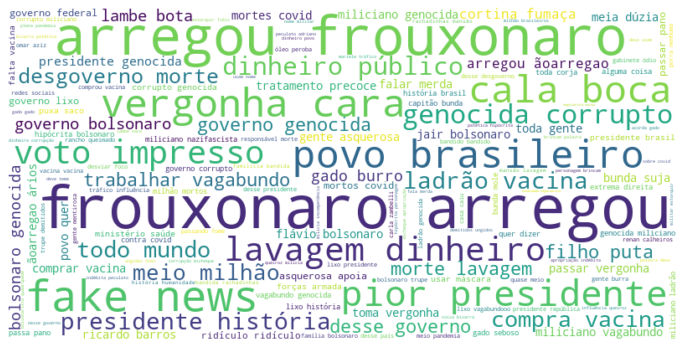

In [52]:
s = res_df.query('factions == "against gov to pro gov" and toxic_pred == 1')
text = s['prep_content'].str.cat(sep=' ')
text = text.lower()
text = ' '.join([word for word in text.split()])
wordcloud = WordCloud(max_font_size=70, max_words=150, background_color='white', width=800, height=400, collocation_threshold=2).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
wordcloud.to_file('figs/toxic_speech_all_2.png')

In [19]:
print(res_df.query('toxic_pred == 1').sample(10)['tweet_content'].values)

['@BolsonaroSP Caralho ein!!! Fizeram uma toalha!!! Pqp!! Agora decola!!! Vai tomar no cu, você e sua família lixo!!   #ForaBolsonaroGenocida #forabolsonarocorrupto'
 '@BolsonaroSP @mfriasoficial @andreporci Gargalhei! Poucas vezes na vida eu vi uma imagem tão patética e tosca! Você é muito ridículo e imbecil, bananinha! É risível! Kkkkkkkkkk 🤣😂 #ForaBolsonaro #BolsonaroGenocida'
 '@senadorhumberto Senador Drácula, a esquerda é demagoga, se vangloria de uma virtude e honestidade que não possui. Criminosos são os que desviaram recursos que era para tratar a covid-19 e foram usados sabe onde, porque não ouvir os responsáveis dos desvios, governadores e prefeitos? Fim da CPI !'
 'Verdade um cafajeste e  um vagabundo  .#CPIDaVergonha. https://t.co/MqufPsVwo5'
 'PIADA DA #CPIdaCovid  :\n@EduGiraoOficial é o independente mais governista que eu já vi, até o @MarcosRogerio(vergonha de RO) esta perdendo pra ele, que feio Girão, se assume logo como concubina de @jairbolsonaro, acho eu que fica m

In [7]:
print(res_df.query('toxic_pred == 1').sample(10)['tweet_content'].values)

['@GleicepAnjos #19JForaBolsonaro, o resto são todos bandidos. 13 anos de corruPTos mataram e desempregaram muito mais.'
 '@EnockFormiga @wrinfo O senador Marcos deveria ter dado voz de prisão ao Renan Ladroeiro, por abuso de autoridade. #RenanCalheirosNaCadeia'
 'Se não fosse por biroliro eu abandonava a politica agora.\n\nVer @OmarAzizSenador presidente de CPI e @renancalheiros pedindo pra prender depoente é o fim.\n\nEles focaram pra atingir @jairbolsonaro e maquiam Governadores e prefeitos os reais mentirosos da pandemia.\n\n#CPIdaVergonha'
 '@mjmacul_lima Isso já virou piada, quem eles pensam que enganam? #RenanVagabundo'
 'O socialismo é a filosofia do fracasso, a crença na ignorância, a pregação da inveja.\nSeu defeito inerente é a distribuição igualitária da miséria.\n“Winston Churchil”\nO STF, continua sendo o ditador do Br, desrespeitando o organismo oficial e legítimo do país. #RenanVagabundo https://t.co/W8RYKTHrhZ'
 '@randolfeap Mostrar os palhaços do Senado???\nCADÊ OS GO

In [20]:
# group interactions numbers
res_df['factions'].value_counts()

pro gov to pro gov            90480
against gov to against gov    45808
against gov to neutral        45207
pro gov to neutral            43665
neutral to neutral            42770
pro gov to against gov        32227
against gov to pro gov        28941
Name: factions, dtype: int64

In [29]:
factions_amount = {}

for fact, amount in zip(res_df['factions'].value_counts().index, res_df['factions'].value_counts().values):
    factions_amount[fact] = amount

In [31]:
factions_amount

{'pro gov to pro gov': 90480,
 'against gov to against gov': 45808,
 'against gov to neutral': 45207,
 'pro gov to neutral': 43665,
 'neutral to neutral': 42770,
 'pro gov to against gov': 32227,
 'against gov to pro gov': 28941}

In [43]:
for faction in factions_amount.keys():
    n_toxic = res_df.query(f'factions=="{faction}"')['toxic_pred'].value_counts()[1]
    print(f'{faction}: {n_toxic} of {factions_amount[faction]}')

pro gov to pro gov: 17100 of 90480
against gov to against gov: 6696 of 45808
against gov to neutral: 9716 of 45207
pro gov to neutral: 11879 of 43665
neutral to neutral: 7608 of 42770
pro gov to against gov: 8393 of 32227
against gov to pro gov: 8860 of 28941


In [13]:
res_df.query('factions == "against gov to neutral" and toxic_pred == 1').sample(100)

,source,target,factions,tweet_content,prep_content,toxic_pred
150419,bruxatecamodoon,OmarAzizSenador,against gov to neutral,@OmarAzizSenador @randolfeap crimes foram come...,crimes cometidos queremos punições culpados fe...,1
189298,IracyMiranda,g1,against gov to neutral,A chapa do Bozo ta esquentando!!\n#ForaBolsona...,chapa bozo esquentando,1
183824,AMRdoFunk,_puppet,against gov to neutral,Esse governo é ridículo. \n#BolsonaroCriminoso...,governo ridículo,1
161490,ablublu_ble,whoandred,against gov to neutral,@whoandred não sai um #ForaBolsonaro nem fuden...,fudendo,1
192590,juniorVP_DF7,Metropoles,against gov to neutral,@Metropoles @jairbolsonaro O pior é quem vai a...,pior atrás desses incompetente,1
...,...,...,...,...,...,...
194303,Pity542,randolfeap,against gov to neutral,A #CPIdaCovid ganhou força com manifestações ...,ganhou força manifestações impropria hipócrita...,1
154278,HenriqueDamasi,folha,against gov to neutral,"@folha Como este cara e um lixo,Arma a bagaça ...",cara lixo arma bagaça bagunça certo agora inte...,1
199816,jeffersontridic,randolfeap,against gov to neutral,@randolfeap Manda o Desgraçado vim a público.\...,manda desgraçado público covarde frases destru...,1
178239,ptribeirao,AAMachadoRP,against gov to neutral,Ex-PGRs divulgam nota contra os ataques ao sis...,pgrs divulgam nota contra ataques sistema elei...,1


In [13]:
len(text)

669257

In [18]:
from collections import Counter
import nltk

In [16]:
bigrams = zip(text, text[1:])
counts = Counter(bigrams)

In [19]:
#print(counts.most_common())

In [45]:
tokens = nltk.word_tokenize(text)

In [46]:
len(tokens)

98243

In [47]:
bgs = nltk.bigrams(tokens)

In [48]:
#fdist = nltk.FreqDist(bgs)
#for k,v in fdist.items():
#    print(k,v)

In [49]:
bg_df = pd.DataFrame(columns=['bigram', 'frequency'], data=fdist.items())

In [50]:
bg_df.sort_values(by='frequency', ascending=False)[:50]

,bigram,frequency
1854,"(governadores, prefeitos)",119
41,"(lula, ladrão)",105
88,"(cala, boca)",101
441,"(povo, brasileiro)",97
322,"(presidente, bolsonaro)",92
866,"(renan, calheiros)",86
429,"(fake, news)",73
1473,"(vergonha, cara)",66
508,"(choro, livre)",63
1766,"(dinheiro, público)",62
